# Advanced `pandas`

The following notebook is dedicated to more advanved opeartions in Pandas:

- `split-apply-combine` pipeline,
- operations on string columns (string operations, replacement),
- joins on Pandas dataframes.

In [100]:
%pylab inline
plt.style.use("bmh")

Populating the interactive namespace from numpy and matplotlib


In [101]:
import numpy as np
import pandas as pd

In [102]:
titanic_train = pd.read_csv("train.csv", index_col="PassengerId")
titanic_test = pd.read_csv("test.csv", index_col="PassengerId")
titanic = pd.concat([titanic_train, titanic_test], sort=False)

In [ ]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [146]:
titanic.groupby("Ticket").size()

Ticket
110152         3
110413         3
110465         2
110469         1
110489         1
              ..
W./C. 6608     5
W./C. 6609     1
W.E.P. 5734    2
W/C 14208      1
WE/P 5735      2
Length: 929, dtype: int64

In [153]:
titanic.groupby("Ticket")["Fare"].mean() / titanic.groupby("Ticket").size()

Ticket
110152         28.833333
110413         26.550000
110465         26.000000
110469         26.000000
110489         26.550000
                 ...    
W./C. 6608      6.875000
W./C. 6609      7.550000
W.E.P. 5734    30.587500
W/C 14208      10.500000
WE/P 5735      35.500000
Length: 929, dtype: float64

In [147]:
titanic.groupby("Ticket").mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Ticket,,,,,,
110152,1.000000,1.0,26.333333,0.000000,0.000000,86.500
110413,0.666667,1.0,36.333333,0.666667,1.333333,79.650
110465,0.000000,1.0,47.000000,0.000000,0.000000,52.000
110469,NaN,1.0,30.000000,0.000000,0.000000,26.000
110489,NaN,1.0,42.000000,0.000000,0.000000,26.550
...,...,...,...,...,...,...
W./C. 6608,0.000000,3.0,22.400000,1.600000,2.400000,34.375
W./C. 6609,0.000000,3.0,NaN,0.000000,0.000000,7.550
W.E.P. 5734,0.000000,1.0,46.500000,1.000000,0.000000,61.175


In [152]:
titanic.groupby("Ticket")["Fare"]

Ticket
110152         86.500
110413         79.650
110465         52.000
110469         26.000
110489         26.550
                ...  
W./C. 6608     34.375
W./C. 6609      7.550
W.E.P. 5734    61.175
W/C 14208      10.500
WE/P 5735      71.000
Name: Fare, Length: 929, dtype: float64

In [167]:
titanic.groupby("Pclass").Ticket.count()

Pclass
1    323
2    277
3    709
Name: Ticket, dtype: int64

In [119]:
titanic.groupby("Ticket").size()

Ticket
110152         3
110413         3
110465         2
110469         1
110489         1
              ..
W./C. 6608     5
W./C. 6609     1
W.E.P. 5734    2
W/C 14208      1
WE/P 5735      2
Length: 929, dtype: int64

In [ ]:
titanic.merge((titanic.groupby("Ticket")["Fare"].mean() / titanic.groupby("Ticket").size()).rename("fare_per_pass"),
              left_on="Ticket", right_index=True, how="left").groupby("Pclass")["fare_per_pass"].mean()

# Split-apply-combine (`GROUP BY` in Pandas)

Depending on how the result of `apply` part of the pipeline is structured, Pandas will `combine` differently. Many common operations have shortcuts, making them extremely concise. We start with the most simple case: `apply` results in a single scalar per group.

Entry point to Pandas grouping:

In [ ]:
class_groups = titanic.groupby("Pclass")

In [ ]:
class_groups

Pandas is smart enough to provide some common operations automatically:

In [ ]:
class_groups.mean()

We can group (only a single column) by a synthetic key:

In [ ]:
age_groups = titanic.Parch.groupby((5 + 10*(titanic.Age//10)))

In [ ]:
5 + 10*(titanic.Age//10)

In [ ]:
age_groups

In [ ]:
age_groups.mean().to_frame() # Note index name

NumPy arrays can also be used as grouping keys:

In [ ]:
age_groups_npy = titanic.Parch.groupby((5 + 10*(titanic.Age//10)).values)

In [ ]:
age_groups_npy.mean().to_frame()

We can group by a set of keys:

In [ ]:
age_groups_multi = titanic.Parch.groupby([(5 + 10*(titanic.Age//10)), titanic.Pclass])

In [ ]:
age_groups_multi = titanic.Parch.groupby([titanic.Pclass, (5 + 10*(titanic.Age//10))])

In [ ]:
age_groups_multi

In [ ]:
age_groups_multi.mean()

We can restructure the result:

In [ ]:
age_groups_multi.mean().unstack()

We can mix column names with a real iterables:

In [ ]:
age_groups_mixed = titanic.groupby([(5 + 10*(titanic.Age//10)), "Pclass", "Embarked"])

In [ ]:
age_groups_mixed

In [ ]:
age_groups_mixed.Parch.mean()

In [ ]:
age_groups_mixed.Parch.mean().unstack(level=(0,2))

## `apply` outputs series

In [40]:
class_groups = titanic.groupby("Pclass") # Nothing is calculated yet

In [41]:
class_groups.mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,39.159930,0.436533,0.365325,87.508992
2,0.472826,29.506705,0.393502,0.368231,21.179196
3,0.242363,24.816367,0.568406,0.400564,13.302889


Let's simulate series output of `apply` stage:

In [42]:
titanic.Fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [43]:
class_groups.Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,323.0,87.508992,80.447178,0.0,30.6958,60.0000,107.6625,512.3292
2,277.0,21.179196,13.607122,0.0,13.0000,15.0458,26.0000,73.5000
3,708.0,13.302889,11.494358,0.0,7.7500,8.0500,15.2458,69.5500


In [44]:
class_groups.apply(lambda x: x.Fare.describe()) # Note column index name

Fare,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,323.0,87.508992,80.447178,0.0,30.6958,60.0000,107.6625,512.3292
2,277.0,21.179196,13.607122,0.0,13.0000,15.0458,26.0000,73.5000
3,708.0,13.302889,11.494358,0.0,7.7500,8.0500,15.2458,69.5500


In [45]:
titanic.groupby("Sex").Parch.mean()

Sex
female    0.633047
male      0.247924
Name: Parch, dtype: float64

In [46]:
class_groups.apply(lambda x: x.groupby("Sex").Parch.mean()) # Note column index name

Sex,female,male
Pclass,,
1,0.472222,0.279330
2,0.650943,0.192982
3,0.731481,0.255578


In [47]:
class_groups.apply(lambda x: x[x.Parch==0].groupby("Sex").size())

Sex,female,male
Pclass,,
1,97,145
2,61,145
3,135,419


The same can be achieved differently, of course:

In [48]:
titanic[titanic.Parch==0].groupby(["Pclass", "Sex"]).size().unstack()

Sex,female,male
Pclass,,
1,97,145
2,61,145
3,135,419


What if `apply` result has multi-index on it's own?

In [49]:
titanic[titanic.Parch!=0].groupby(["Sex", "Embarked"]).size()

Sex     Embarked
female  C            42
        Q             3
        S           128
male    C            32
        Q             6
        S            96
dtype: int64

In [50]:
class_groups.apply(lambda x: x[x.Parch!=0].groupby(["Sex", "Embarked"]).size())

Pclass  Sex     Embarked
1       female  C           21
                S           26
        male    C           18
                S           16
2       female  C            4
                S           41
        male    C            3
                S           23
3       female  C           17
                Q            3
                S           61
        male    C           11
                Q            6
                S           57
dtype: int64

In [51]:
result_s = (class_groups
            .apply(lambda x: x[x.Parch!=0].groupby(["Sex", "Embarked"]).size()))

In [52]:
result = (class_groups
          .apply(lambda x: x[x.Parch!=0].groupby(["Sex", "Embarked"]).size())
          .unstack([1,2]))

In [53]:
result

Sex      female        male       female male
Embarked      C     S     C     S      Q    Q
Pclass                                       
1          21.0  26.0  18.0  16.0    NaN  NaN
2           4.0  41.0   3.0  23.0    NaN  NaN
3          17.0  61.0  11.0  57.0    3.0  6.0

### Intermezzo: indexing a multi-indexed dataframe

In [54]:
result.loc[:, ("female", "C")]

Pclass
1    21.0
2     4.0
3    17.0
Name: (female, C), dtype: float64

In [55]:
result.loc[:, [("female", "C"), ("female", "S")]]

Sex      female      
Embarked      C     S
Pclass               
1          21.0  26.0
2           4.0  41.0
3          17.0  61.0

Positional index is slightly different, as it known nothing about multi-index *per se*:

In [56]:
result.iloc[:, [0, 1]]

Sex      female      
Embarked      C     S
Pclass               
1          21.0  26.0
2           4.0  41.0
3          17.0  61.0

## DataFrame output

In [57]:
titanic[["SibSp", "Parch"]].head()

,SibSp,Parch
PassengerId,,
1,1,0
2,1,0
3,0,0
4,1,0
5,0,0


In [58]:
(titanic[titanic.Parch!=0]
 .groupby(["Sex", "Embarked"])[["SibSp", "Parch"]]
 .mean())

SibSp     Parch
Sex    Embarked                    
female C         0.619048  1.380952
       Q         0.333333  2.666667
       S         1.304688  1.789062
male   C         0.562500  1.312500
       Q         3.500000  1.000000
       S         1.833333  1.677083

In [59]:
class_groups

In [60]:
(class_groups
 .apply(lambda x: x[x.Parch!=0].groupby(["Sex", "Embarked"])[["SibSp", "Parch"]]
        .mean()))

SibSp     Parch
Pclass Sex    Embarked                    
1      female C         0.523810  1.285714
              S         0.807692  1.576923
       male   C         0.444444  1.388889
              S         0.875000  1.562500
2      female C         1.000000  1.750000
              S         0.682927  1.512195
       male   C         0.666667  1.666667
              S         0.869565  1.217391
3      female C         0.647059  1.411765
              Q         0.333333  2.666667
              S         1.934426  2.065574
       male   C         0.727273  1.090909
              Q         3.500000  1.000000
              S         2.491228  1.894737

## Mixing group keys

In [61]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
titanic_idx = titanic.reset_index().set_index((5 + 10*(titanic.Age//10)))

In [63]:
titanic_idx.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Age,,,,,,,,,,,,
25.0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
35.0,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
25.0,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
35.0,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
35.0,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


`pd.Grouper` is an entry point to complex mixed groupings:

In [64]:
pd.Grouper?

Init signature: pd.Grouper(*args, **kwargs)
Docstring:     
A Grouper allows the user to specify a groupby instruction for an object.

This specification will select a column via the key parameter, or if the
level and/or axis parameters are given, a level of the index of the target
object.

If `axis` and/or `level` are passed as keywords to both `Grouper` and
`groupby`, the values passed to `Grouper` take precedence.

Parameters
----------
key : str, defaults to None
    Groupby key, which selects the grouping column of the target.
level : name/number, defaults to None
    The level for the target index.
freq : str / frequency object, defaults to None
    This will groupby the specified frequency if the target selection
    (via key or level) is a datetime-like object. For full specification
    of available frequencies, please see `here
    <https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases>`_.
axis : str, int, defaults to 0
    Number/name of the 

In [65]:
titanic_idx.groupby([pd.Grouper(level="Age"), "Pclass"]).Parch.mean()

Age   Pclass
5.0   1         2.000000
      2         1.409091
      3         1.339286
15.0  1         0.863636
      2         0.310345
      3         0.445652
25.0  1         0.480769
      2         0.288889
      3         0.128713
35.0  1         0.250000
      2         0.265625
      3         0.395833
45.0  1         0.209677
      2         0.451613
      3         0.976190
55.0  1         0.369565
      2         0.235294
      3         0.000000
65.0  1         0.761905
      2         0.142857
      3         0.000000
75.0  1         0.250000
      2         0.000000
      3         0.000000
85.0  1         0.000000
Name: Parch, dtype: float64

In [66]:
titanic_idx.index

Float64Index([25.0, 35.0, 25.0, 35.0, 35.0,  nan, 55.0,  5.0, 25.0, 15.0,
              ...
               nan,  5.0,  nan, 35.0, 25.0,  nan, 35.0, 35.0,  nan,  nan],
             dtype='float64', name='Age', length=1309)

In [67]:
titanic_idx.groupby([titanic_idx.index, "Pclass"]).Parch.mean()

Age   Pclass
5.0   1         2.000000
      2         1.409091
      3         1.339286
15.0  1         0.863636
      2         0.310345
      3         0.445652
25.0  1         0.480769
      2         0.288889
      3         0.128713
35.0  1         0.250000
      2         0.265625
      3         0.395833
45.0  1         0.209677
      2         0.451613
      3         0.976190
55.0  1         0.369565
      2         0.235294
      3         0.000000
65.0  1         0.761905
      2         0.142857
      3         0.000000
75.0  1         0.250000
      2         0.000000
      3         0.000000
85.0  1         0.000000
Name: Parch, dtype: float64

### Intermezzo: on `size` vs. `count`

`size` is a method to get, you name it, **size** of something, in this case, of a group:

In [68]:
titanic.groupby('Pclass').size()  ## how many elements are in each group

Pclass
1    323
2    277
3    709
dtype: int64

But you **count** only something specific:

In [69]:
titanic.groupby('Pclass').count()

,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,
1,216,323,323,284,323,323,323,323,256,321
2,184,277,277,261,277,277,277,277,23,277
3,491,709,709,501,709,709,709,708,16,709


As you can see, `count` only counts non-missing values, i.e. something, that is present in the dataframe. Hence, a bit more elaborated way of getting (almost) the same is:

In [70]:
titanic.isnull()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1305,True,False,False,False,True,False,False,False,False,True,False
1306,True,False,False,False,False,False,False,False,False,False,False
1307,True,False,False,False,False,False,False,False,False,True,False


In [71]:
titanic.groupby('Pclass').apply(lambda group: group.notnull().sum())

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,323,323,323,284,323,323,323,323,256,321
2,184,277,277,277,261,277,277,277,277,23,277
3,491,709,709,709,501,709,709,709,708,16,709


# How `S-A-C` is important in exploratory data analysis

In [72]:
titanic.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [73]:
titanic["AgeGroup"] = 5 + 10*(titanic.Age//10)
titanic[["Age", "AgeGroup"]]

,Age,AgeGroup
PassengerId,,
1,22.0,25.0
2,38.0,35.0
3,26.0,25.0
4,35.0,35.0
5,35.0,35.0
...,...,...
1305,NaN,NaN
1306,39.0,35.0
1307,38.5,35.0


Let's calculate something non-trivial. For example, percentage of each age group and sex combination, per class:

In [74]:
titanic_dna = titanic[titanic.Age.notnull()]  # it's a matter of discussion, if we need this: think on it a bit
group_counts = titanic_dna.groupby(['Pclass', 'AgeGroup', 'Sex']).size()/titanic_dna.groupby('Pclass').size()
group_counts.head()

Pclass  AgeGroup  Sex   
1       5.0       female    0.003521
                  male      0.010563
        15.0      female    0.052817
                  male      0.024648
        25.0      female    0.095070
dtype: float64

In [77]:
group_counts.unstack(level=1)

AgeGroup           5.0       15.0      25.0      35.0      45.0      55.0  \
Pclass Sex                                                                  
1      female  0.003521  0.052817  0.095070  0.133803  0.077465  0.073944   
       male    0.010563  0.024648  0.088028  0.119718  0.140845  0.088028   
2      female  0.042146  0.049808  0.145594  0.084291  0.045977  0.022989   
       male    0.042146  0.061303  0.199234  0.160920  0.072797  0.042146   
3      female  0.053892  0.071856  0.099800  0.051896  0.023952       NaN   
       male    0.057884  0.111776  0.303393  0.139721  0.059880  0.013972   

AgeGroup           65.0      75.0      85.0  
Pclass Sex                                   
1      female  0.028169  0.003521       NaN  
       male    0.045775  0.010563  0.003521  
2      female  0.003831       NaN       NaN  
       male    0.022989  0.003831       NaN  
3      female  0.001996       NaN       NaN  
       male    0.005988  0.003992       NaN

A simple way to validate the calculation:

In [ ]:
group_counts.groupby(level=0).sum()

Main advantage of Pandas for EDA comes from very flexible inter-operability of analytics and plotting:

In [78]:
group_counts = group_counts.unstack()

In [79]:
group_counts

Sex                female      male
Pclass AgeGroup                    
1      5.0       0.003521  0.010563
       15.0      0.052817  0.024648
       25.0      0.095070  0.088028
       35.0      0.133803  0.119718
       45.0      0.077465  0.140845
       55.0      0.073944  0.088028
       65.0      0.028169  0.045775
       75.0      0.003521  0.010563
       85.0           NaN  0.003521
2      5.0       0.042146  0.042146
       15.0      0.049808  0.061303
       25.0      0.145594  0.199234
       35.0      0.084291  0.160920
       45.0      0.045977  0.072797
       55.0      0.022989  0.042146
       65.0      0.003831  0.022989
       75.0           NaN  0.003831
3      5.0       0.053892  0.057884
       15.0      0.071856  0.111776
       25.0      0.099800  0.303393
       35.0      0.051896  0.139721
       45.0      0.023952  0.059880
       55.0           NaN  0.013972
       65.0      0.001996  0.005988
       75.0           NaN  0.003992

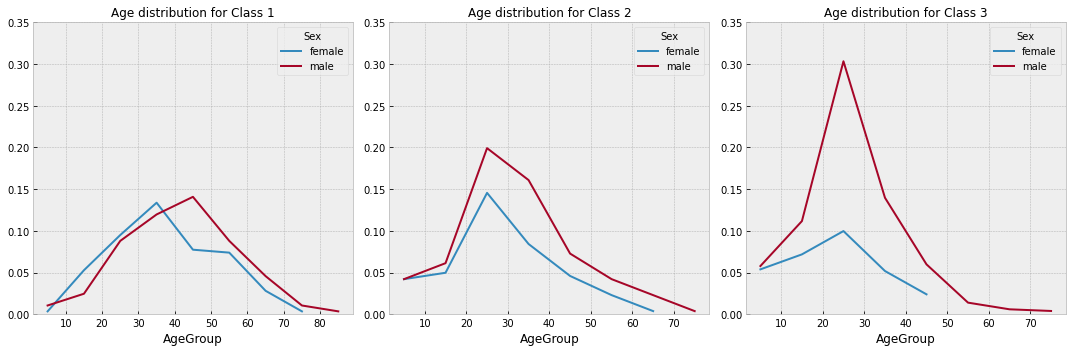

In [80]:
plt.figure(figsize=(15, 5))

for pclass in [1, 2, 3]:
    plt.subplot(1, 3, pclass)
    group_counts.loc[pclass].plot(ax=plt.gca())
    plt.ylim(0, 0.35)
    plt.title("Age distribution for Class %i" % pclass, fontsize=12)
plt.tight_layout()

In [81]:
survival_groups = titanic.groupby(['Pclass', 'AgeGroup', 'Sex']).Survived.mean()
survival_groups

Pclass  AgeGroup  Sex   
1       5.0       female    0.000000
                  male      1.000000
        15.0      female    1.000000
                  male      0.400000
        25.0      female    0.937500
                  male      0.500000
        35.0      female    1.000000
                  male      0.521739
        45.0      female    1.000000
                  male      0.375000
        55.0      female    0.916667
                  male      0.266667
        65.0      female    1.000000
                  male      0.100000
        75.0      female         NaN
                  male      0.000000
        85.0      male      1.000000
2       5.0       female    1.000000
                  male      1.000000
        15.0      female    1.000000
                  male      0.100000
        25.0      female    0.880000
                  male      0.000000
        35.0      female    0.941176
                  male      0.096774
        45.0      female    0.900000
             

In [82]:
survival_groups = survival_groups.unstack()

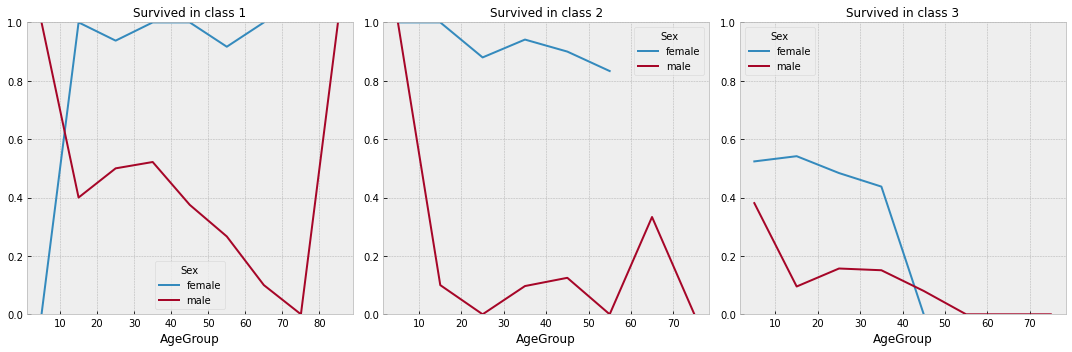

In [83]:
plt.figure(figsize=(15, 5))

for pclass in [1, 2, 3]:
    plt.subplot(1, 3, pclass)
    survival_groups.loc[pclass].plot(ax=plt.gca())
    plt.ylim(0, 1)
    plt.title("Survived in class %i" % pclass, fontsize=12)
plt.tight_layout()

In [94]:
siblings_groups = titanic.groupby(['Pclass', 'AgeGroup', 'Sex']).SibSp.mean()
siblings_groups = siblings_groups.unstack()

In [95]:
siblings_groups

Sex                female      male
Pclass AgeGroup                    
1      5.0       1.000000  0.333333
       15.0      0.600000  1.142857
       25.0      0.703704  0.320000
       35.0      0.394737  0.323529
       45.0      0.500000  0.375000
       55.0      0.619048  0.480000
       65.0      0.625000  0.384615
       75.0      1.000000  0.333333
       85.0           NaN  0.000000
2      5.0       0.818182  0.818182
       15.0      0.384615  0.062500
       25.0      0.631579  0.384615
       35.0      0.363636  0.380952
       45.0      0.416667  0.315789
       55.0      0.166667  0.181818
       65.0      1.000000  0.333333
       75.0           NaN  0.000000
3      5.0       1.666667  2.413793
       15.0      0.777778  0.964286
       25.0      0.300000  0.171053
       35.0      0.653846  0.185714
       45.0      0.583333  0.200000
       55.0           NaN  0.142857
       65.0      0.000000  0.000000
       75.0           NaN  0.000000

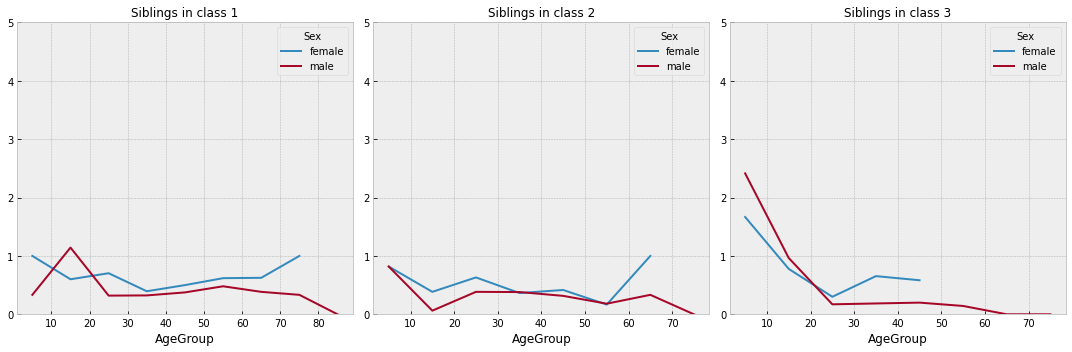

In [86]:
plt.figure(figsize=(15, 5))

for pclass in [1, 2, 3]:
    plt.subplot(1, 3, pclass)
    siblings_groups.loc[pclass].plot(ax=plt.gca())
    plt.ylim(0, 5)
    plt.title("Siblings in class %i" % pclass, fontsize=12)
plt.tight_layout()

In [87]:
embark_counts = titanic.groupby(['Pclass', 'AgeGroup', 'Sex', 'Embarked']).size()/titanic.groupby('Pclass').size()

embark_counts

Pclass  AgeGroup  Sex     Embarked
1       5.0       female  S           0.003096
                  male    C           0.003096
                          S           0.006192
        15.0      female  C           0.015480
                          S           0.030960
                                        ...   
3       65.0      female  S           0.001410
                  male    Q           0.001410
                          S           0.002821
        75.0      male    Q           0.001410
                          S           0.001410
Length: 94, dtype: float64

In [88]:
embark_counts = embark_counts.unstack([-1, -2])
embark_counts

Embarked                S         C         S         C         Q          
Sex                female      male      male    female    female      male
Pclass AgeGroup                                                            
1      5.0       0.003096  0.003096  0.006192       NaN       NaN       NaN
       15.0      0.030960  0.009288  0.012384  0.015480       NaN       NaN
       25.0      0.043344  0.043344  0.034056  0.040248       NaN       NaN
       35.0      0.052632  0.043344  0.061920  0.055728  0.006192       NaN
       45.0      0.024768  0.043344  0.077399  0.043344       NaN  0.003096
       55.0      0.027864  0.034056  0.043344  0.037152       NaN       NaN
       65.0      0.012384  0.012384  0.027864  0.009288       NaN       NaN
       75.0      0.003096  0.006192  0.003096       NaN       NaN       NaN
       85.0           NaN       NaN  0.003096       NaN       NaN       NaN
2      5.0       0.032491  0.003610  0.036101  0.007220       NaN       NaN
       15.0      0.039711       NaN  0.057762  0.007220       NaN       NaN
       25.0      0.115523  0.021661  0.166065  0.021661       NaN       NaN
       35.0      0.072202  0.018051  0.129964  0.003610  0.003610  0.003610
       45.0      0.043321  0.003610  0.064982       NaN       NaN       NaN
       55.0      0.021661       NaN  0.036101       NaN       NaN  0.003610
       65.0      0.003610       NaN  0.014440       NaN       NaN  0.007220
       75.0           NaN       NaN  0.003610       NaN       NaN       NaN
3      5.0       0.028209  0.004231  0.031030  0.009873       NaN  0.005642
       15.0      0.025388  0.008463  0.067701  0.014104  0.011283  0.002821
       25.0      0.059238  0.026798  0.177715  0.002821  0.008463  0.009873
       35.0      0.025388  0.011283  0.081805  0.001410  0.009873  0.005642
       45.0      0.014104  0.002821  0.036671  0.002821       NaN  0.002821
       55.0           NaN       NaN  0.009873       NaN       NaN       NaN
       65.0      0.001410       NaN  0.002821       NaN       NaN  0.001410
       75.0           NaN       NaN  0.001410       NaN       NaN  0.001410

### Intermezzo: Seaborn in EDA

In [98]:
import seaborn as sns

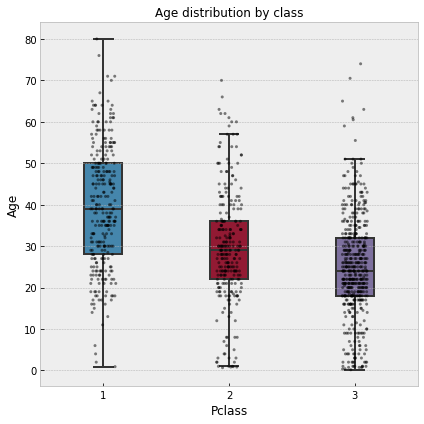

In [99]:
plt.figure(figsize=(6,6))

# We will plot jittered version of the data, hence we remove fliers
sns.boxplot(x="Pclass", y="Age", data=titanic,
            fliersize=0, width=0.3)
sns.stripplot(x="Pclass", y="Age", data=titanic,
              color="k", alpha=0.5, size=3)
plt.title("Age distribution by class", fontsize=12)
plt.tight_layout();

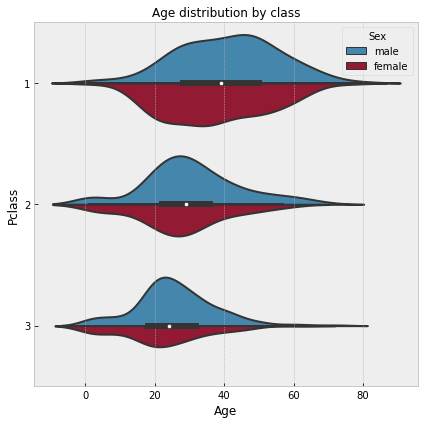

In [91]:
plt.figure(figsize=(6,6))

sns.violinplot(x="Age", y="Pclass", data=titanic,
               split=True, hue="Sex", scale="count", orient="h")
plt.title("Age distribution by class", fontsize=12)
plt.tight_layout();

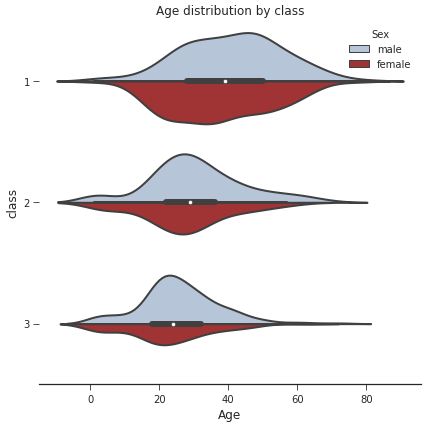

In [92]:
with plt.style.context("seaborn-ticks"):
    plt.figure(figsize=(6,6))

    sns.violinplot(x="Age", y="Pclass", data=titanic,
                   split=True, hue="Sex", scale="count", orient="h",
                   palette={"male": "lightsteelblue", "female": "firebrick"})
    plt.title("Age distribution by class", fontsize=12)

    sns.despine(left=True)

    plt.ylabel("class")

    plt.tight_layout();

For comparison:

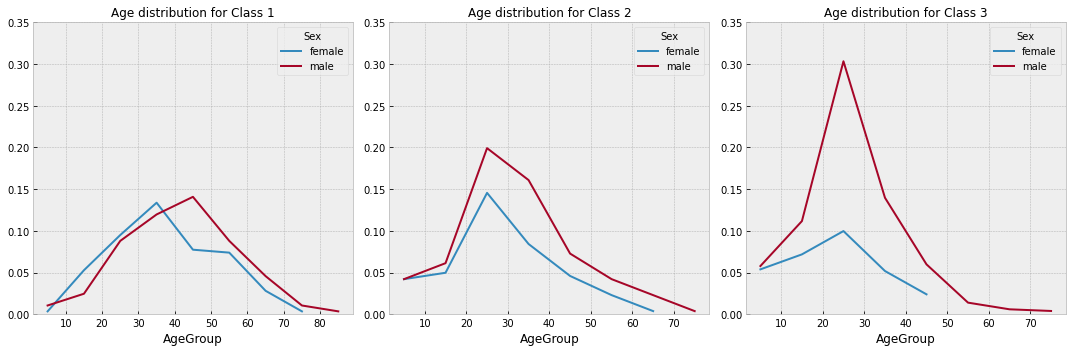

In [93]:
plt.figure(figsize=(15, 5))

for pclass in [1, 2, 3]:
    plt.subplot(1, 3, pclass)
    group_counts.loc[pclass].plot(ax=plt.gca())
    plt.ylim(0, 0.35)
    plt.title("Age distribution for Class %i" % pclass, fontsize=12)
plt.tight_layout()